## Face recognition on a bunch of labeled faces 

In [1]:
import pylab as pl
import numpy as np
%pylab inline
from PIL import Image
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


## Wild dataset labeled faces

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
X = lfw_people.data
y = lfw_people.target
_, h, w = lfw_people.images.shape
names = lfw_people.target_names



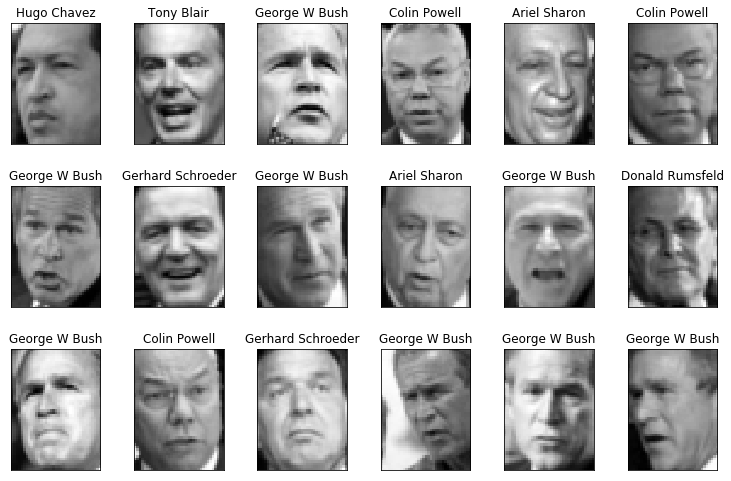

In [24]:
def plot(images, titles, h, w, n_row=3, n_col = 6):
    pl.figure(figsize = (1.7*n_col, 2.3*n_row))
    pl.subplots_adjust(bottom =0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row*n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

plot(X, names[y], h, w)

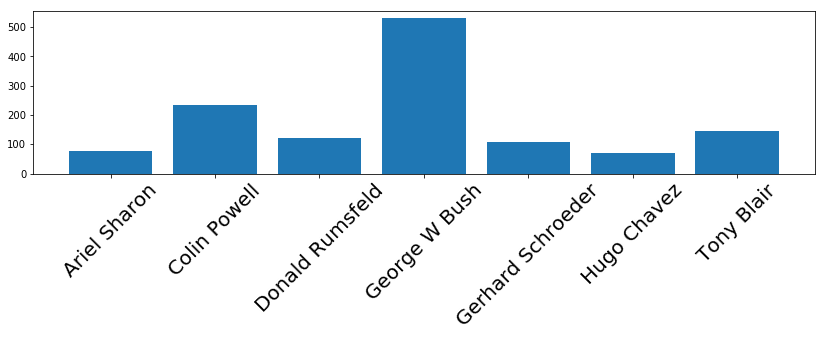

In [25]:
pl.figure(figsize = (14,3))

y_unique = np.unique(y)
counts = [(y==i).sum() for i in y_unique]

pl.xticks(y_unique, names[y_unique])
locs, labels = pl.xticks()
pl.setp(labels, rotation=45, size=20)
_ = pl.bar(y_unique, counts)

## Splitting the dataset for training and testing

In [26]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Eigenfaces and feature extraction with Random PCA

In [27]:
from sklearn.decomposition import RandomizedPCA

n_components = 150


pca = RandomizedPCA(n_components=n_components, whiten=True)

%time pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

CPU times: user 351 ms, sys: 27.7 ms, total: 379 ms
Wall time: 108 ms


/Users/pranavbarot/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


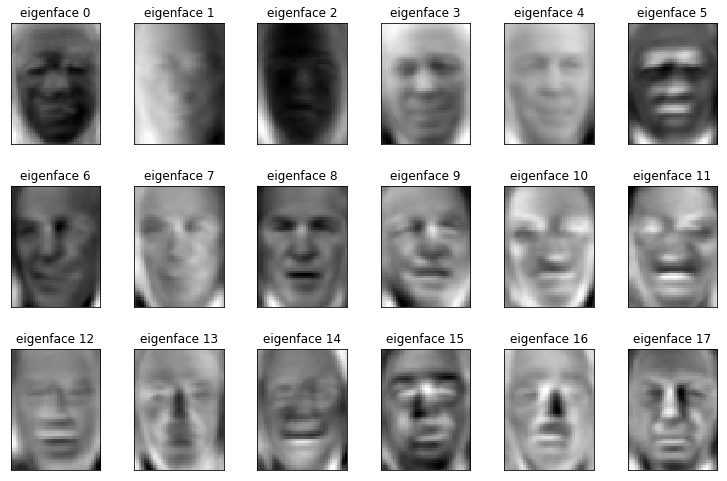

In [28]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot(eigenfaces, eigenface_titles, h, w)

In [9]:
X_train_pca = pca.transform(X_train)

## Training a Support Vector Machine

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', class_weight = 'auto')

svm

SVC(C=1.0, cache_size=200, class_weight='auto', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import cross_val_score

cv = StratifiedShuffleSplit(y_train, test_size=0.20, n_iter=3)


## CV Grid Search for finding best hyperparameters

In [13]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(svm, param_grid, scoring='f1', cv=cv, n_jobs=2)

    

## Evaluate the best model on the test set

In [ ]:

clf = clf.fit(X_train_pca, y_train
             
             )
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

<img src="prediction.png">

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=names))


## Class report (had issues with running it in the code cell)

In [ ]:

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.76      0.79        17
     Colin Powell       0.89      0.84      0.86        61
  Donald Rumsfeld       0.85      0.74      0.79        31
    George W Bush       0.90      0.96      0.93       134
Gerhard Schroeder       0.76      0.84      0.80        19
      Hugo Chavez       0.89      0.89      0.89        19
       Tony Blair       0.84      0.78      0.81        41

      avg / total       0.87      0.87      0.87       322


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
print(cm)

[[ 13   2   1   1   0   0   0]
 [  2  51   0   4   1   0   3]
 [  0   1  23   5   1   1   0]
 [  1   1   2 129   0   0   1]
 [  0   0   1   0  16   1   1]
 [  0   0   0   0   1  17   1]
 [  0   2   0   5   2   0  32]]